In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("Crop_recommendation.csv")
col=df.iloc[:,-1:]
#col.head()
l=col['label'].unique()
print(type(l))
print(l)
res=[]
i=0
d ={}
for crop in l :
    d[crop] = i
    i+=1
print(d)
print(np.where(l=='rice')[0])
#df.head()

<class 'numpy.ndarray'>
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
{'rice': 0, 'maize': 1, 'chickpea': 2, 'kidneybeans': 3, 'pigeonpeas': 4, 'mothbeans': 5, 'mungbean': 6, 'blackgram': 7, 'lentil': 8, 'pomegranate': 9, 'banana': 10, 'mango': 11, 'grapes': 12, 'watermelon': 13, 'muskmelon': 14, 'apple': 15, 'orange': 16, 'papaya': 17, 'coconut': 18, 'cotton': 19, 'jute': 20, 'coffee': 21}
[0]


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
ds=pd.read_csv("Crop_recommendation.csv")
ds.head()
col=ds[['label']].copy()
print(type(col))
l=col['label'].unique()
i=0
d={}
for p in l:
    d[p]=i
    i+=1

y=[]
for j in col['label']:
    # print(d[j])
    y.append(d[j])
# print(res)
x=ds.iloc[:,:-1]
x=np.array(x)
y=np.array(y)
print(type(x))
print(d)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
{'rice': 0, 'maize': 1, 'chickpea': 2, 'kidneybeans': 3, 'pigeonpeas': 4, 'mothbeans': 5, 'mungbean': 6, 'blackgram': 7, 'lentil': 8, 'pomegranate': 9, 'banana': 10, 'mango': 11, 'grapes': 12, 'watermelon': 13, 'muskmelon': 14, 'apple': 15, 'orange': 16, 'papaya': 17, 'coconut': 18, 'cotton': 19, 'jute': 20, 'coffee': 21}


In [12]:
# using the train test split function

X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=104,test_size=0.25)
# print(X_train.dtypes)


In [13]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as mp

dtree=DecisionTreeClassifier()
dtree=dtree.fit(X_train,y_train)

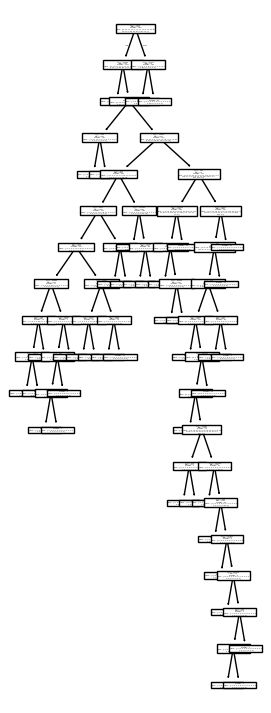

In [14]:
mp.figure(figsize=(3,9))
tree.plot_tree(dtree)
mp.show()

In [15]:
y_predict=dtree.predict(X_test)
print(y_predict)

[ 8  5  9  8  8 13 11 19  6 19  6 19  4 20 12  1 21 14 18 13 17  4  0  3
  0 13 17 16 10  7 15  2 17  7 10 16 20 12  2 17  0  4  8  3 21 20  6 12
  8  8  9 13 13 16  7  3 21 21  1 11 17  9  2  3 13  1 13 12  3 14  8 11
  3 12  1  5 18  8 11 10  0 16 20  0 11  2  1 21  8 19  1 18  4 19  8  2
 14 18 17  5  8 14  3 18 15 15 20  5 20 20  7 10 18  6  4 20 16  7  4 20
 10  8 10 20  5 21 11 16 18  4  8  2 17  0 13 16 11  4  9  4 17 13 16  4
  5  8 20 17 21  2 10 15 19  7 14 20 20 12  8  9  0  1 14 21  0  6  3 14
 14 16 16 19  7  2  5  7  3  8 16 15  1 19 14  4  3 13  9 10 10 16  5 14
 18 13 14  5 12 13 12  9 21  7  7 20 13  1 16  2  4 13 10 15  2  6  9 11
 18 12  6  7 18 21 20 11 12  5  1  2 16 10 12 19  4  5  4  6 20 20 18  7
 19  1 20 16 19  8  6  0 17  1  8  4  3  0 14  6  8 16 18 18  7 14 12  8
  9  1 16 11 19 12 16 15 12 13 21  9  3 12  2 16  2  2 18 10 12  1  8  8
 20 10  1 12 18  0  7  3  5 17 21 21 13  4 20  0 14  9  9 15 15  1 13  2
  5 13 11  9 13  2  9  9  2  3 16  4 15 13 19  1  9

In [16]:
from sklearn import metrics
metrics.accuracy_score(y_test,dtree.predict(X_test))*100


98.36363636363636

In [17]:
from joblib import dump
dump(dtree,"crop_model.joblib")

['crop_model.joblib']